## 💼 Project: Fraud Detection using Machine Learning


In [3]:
import pandas as pd
import numpy as np

print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)


Pandas version: 2.2.3
NumPy version: 2.2.4


In [4]:
import pandas as pd
df = pd.read_csv("fraud.csv")  
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:

print(df['isFraud'].value_counts())

print(df['type'].value_counts())


isFraud
0    6354407
1       8213
Name: count, dtype: int64
type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


In [6]:

df_filtered = df[df['type'].isin(['CASH_OUT', 'TRANSFER'])]


print(df_filtered['isFraud'].value_counts())


df_filtered.to_csv("filtered_fraud.csv", index=False)


isFraud
0    2762196
1       8213
Name: count, dtype: int64


In [7]:
df_filtered = df_filtered.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)


In [8]:
df_filtered = pd.get_dummies(df_filtered, columns=['type'], drop_first=True)


In [9]:
X = df_filtered.drop('isFraud', axis=1)
y = df_filtered['isFraud']


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


ModuleNotFoundError: No module named 'sklearn'

In [11]:
!pip install scikit-learn


  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/a1/a6/c5b78606743a1f28eae8f11973de6613a5ee87366796583fb74c67d54939/scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.6.0 from https://files.pythonhosted.org/packages/b9/8b/7ec1832b09dbc88f3db411f8cdd47db04505c4b72c99b11c920a8f0479c3/scipy-1.15.2-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB ? eta 0:00:00
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/91/29/df4b9b42f2be0b623cbd5e2140cafcaa2bef0759a00b7b70104dcfe2fb51/joblib-1.4.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/32/d5/f9a850d79b0851d1d4ef6456097579a9005b31fea68726a4ae5f2d82ddd9/threadpoolctl-3.6.0-py3-none-any.whl.metadata
   

In [13]:
from sklearn.model_selection import train_test_split


In [14]:
from sklearn.model_selection import train_test_split

# Assuming X contains features and y contains target variable
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[552378     61]
 [   840    803]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552439
           1       0.93      0.49      0.64      1643

    accuracy                           1.00    554082
   macro avg       0.96      0.74      0.82    554082
weighted avg       1.00      1.00      1.00    554082



## 🧹 Data Preprocessing

The dataset was preprocessed as follows:

1. **Filtered Transaction Types** - Only `TRANSFER` and `CASH_OUT` types were retained since fraud mostly occurs in these categories.
2. **Removed Redundant Columns** - Columns like `nameOrig`, `nameDest`, and `isFlaggedFraud` were removed as they do not contribute to prediction.
3. **Label Encoding** - The `type` column was encoded to numeric form using one-hot encoding.
4. **Feature Selection** - Retained relevant features for modeling: `step`, `amount`, `oldbalanceOrg`, `newbalanceOrig`, `oldbalanceDest`, `newbalanceDest`, and encoded transaction types.
5. **Train-Test Split** - The data was split into training and testing sets using stratified sampling to preserve the class balance.



### 3. ⚖️ Handling Class Imbalance with SMOTE

Since fraud transactions are rare compared to non-fraud transactions, the dataset is highly imbalanced. This imbalance can cause machine learning models to perform poorly on the minority (fraud) class. To address this, we used **SMOTE (Synthetic Minority Oversampling Technique)**, which generates synthetic samples of the minority class to balance the dataset and improve model performance.


In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE only to the training data
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

# Check class distribution after resampling
print("Resampled class distribution:")
print(y_res.value_counts())


In [17]:
!pip install imbalanced-learn


  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/9d/41/721fec82606242a2072ee909086ff918dfad7d0199a9dfd4928df9c72494/imbalanced_learn-0.13.0-py3-none-any.whl.metadata
  Obtaining dependency information for sklearn-compat<1,>=0.1 from https://files.pythonhosted.org/packages/f0/a8/ad69cf130fbd017660cdd64abbef3f28135d9e2e15fe3002e03c5be0ca38/sklearn_compat-0.1.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/238.4 kB ? eta -:--:--
   ---------------------------------------- 238.4/238.4 kB 7.4 MB/s eta 0:00:00


In [18]:
from imblearn.over_sampling import SMOTE


In [19]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE only to the training data
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# Check the new class distribution
from collections import Counter
print("Resampled training set class distribution:", Counter(y_train_resampled))


Resampled training set class distribution: Counter({0: 2209757, 1: 2209757})


In [21]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=42)

import time
start = time.time()

model.fit(X_train_resampled, y_train_resampled)
print("Training time (sec):", time.time() - start)

y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Training time (sec): 88.19592356681824
Confusion Matrix:
[[541022  11417]
 [    52   1591]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    552439
           1       0.12      0.97      0.22      1643

    accuracy                           0.98    554082
   macro avg       0.56      0.97      0.60    554082
weighted avg       1.00      0.98      0.99    554082



In [23]:
!pip install lightgbm


  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/5e/23/f8b28ca248bb629b9e08f877dd2965d1994e1674a03d67cd10c5246da248/lightgbm-4.6.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------- ----------------------- 0.6/1.5 MB 12.4 MB/s eta 0:00:01
   -------------------------------------- - 1.4/1.5 MB 17.9 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 13.1 MB/s eta 0:00:00


In [24]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix
import time

# Initialize the model
lgbm = LGBMClassifier(random_state=42)

# Train the model and measure time
start_time = time.time()
lgbm.fit(X_train_resampled, y_train_resampled)
training_time = time.time() - start_time

# Make predictions
y_pred_lgbm = lgbm.predict(X_test)

# Evaluation
print(f"Training time (sec): {training_time}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lgbm))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lgbm))


[LightGBM] [Info] Number of positive: 2209757, number of negative: 2209757
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.082331 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1532
[LightGBM] [Info] Number of data points in the train set: 4419514, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training time (sec): 13.796351671218872
Confusion Matrix:
[[548363   4076]
 [     8   1635]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    552439
           1       0.29      1.00      0.44      1643

    accuracy                           0.99    554082
   macro avg       0.64      0.99      0.72    554082
weighted avg       1.00      0.99      0.99    554082



In [26]:
!pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/d7/68/0d03098b3feb786cbd494df0aac15b571effda7f7cbdec267e8a8d398c16/matplotlib-3.10.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/a8/7e/cd93cab453720a5d6cb75588cc17dcdc08fc3484b9de98b885924ff61900/contourpy-1.3.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/13/4c/de2612ea2216eb45cfc8eb91a8501615dd87716feaf5f8fb65cbca576289/fonttools-4.57.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/104.6 kB ? eta -:--:--
     -------------------------------------- 104.6/104.6 kB 5.9 MB/s 

In [28]:
!pip install seaborn

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ------------------------------- -------- 235.5/294.9 kB 7.3 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 6.1 MB/s eta 0:00:00


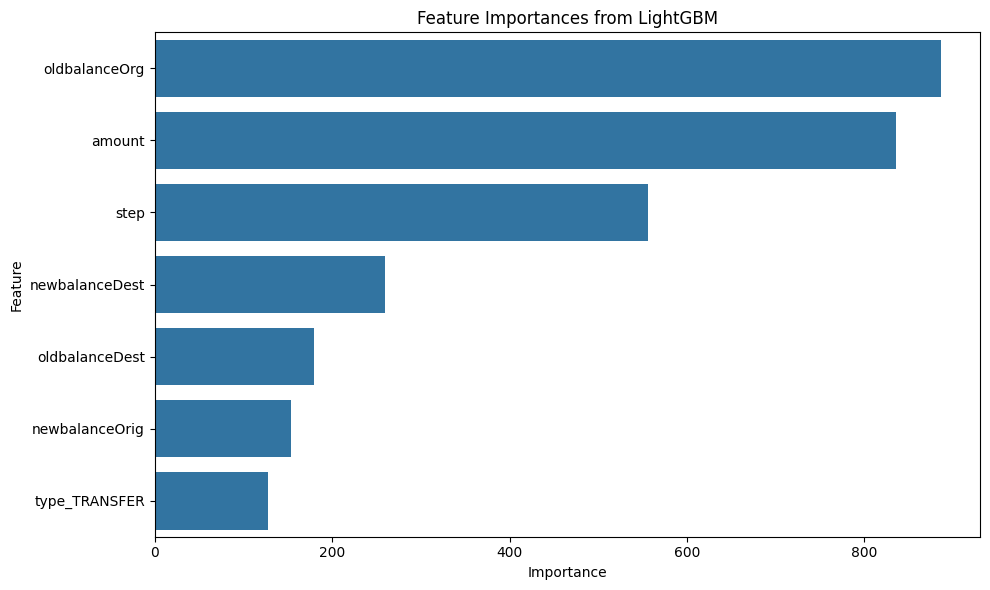

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting feature importances
feature_importances = lgbm.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
fi_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
fi_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=fi_df)
plt.title('Feature Importances from LightGBM')
plt.tight_layout()
plt.show()


In [31]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/5e/03/15cd49e855c62226ecf1831bbe4c8e73a4324856077a23c495538a36e557/xgboost-3.0.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/150.0 MB 2.8 MB/s eta 0:00:53
   ---------------------------------------- 0.3/150.0 MB 3.9 MB/s eta 0:00:38
   ---------------------------------------- 0.5/150.0 MB 3.5 MB/s eta 0:00:43
   ---------------------------------------- 0.7/150.0 MB 3.8 MB/s eta 0:00:40
   ---------------------------------------- 1.0/150.0 MB 4.4 MB/s eta 0:00:34
   ---------------------------------------- 1.3/150.0 MB 4.7 MB/s eta 0:00:32
   ---------------------------------------- 1.6/150.0 MB 4.9 MB/s eta 0:00:31
   ---------------------------------------- 1.9/150.0 MB 4.9 MB/s eta 0:00:30
    --------------------------------------- 2.0/150.0 MB 5.2 MB/s eta 0:00:29
    ------------------

In [32]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
import time

# Train the XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
start_time = time.time()
xgb.fit(X_train_resampled, y_train_resampled)
end_time = time.time()

# Predictions
y_pred_xgb = xgb.predict(X_test)

# Evaluation
print("Training time (sec):", end_time - start_time)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))


C:\Users\Madhav\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:13:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training time (sec): 16.785232543945312
Confusion Matrix:
[[550343   2096]
 [    17   1626]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552439
           1       0.44      0.99      0.61      1643

    accuracy                           1.00    554082
   macro avg       0.72      0.99      0.80    554082
weighted avg       1.00      1.00      1.00    554082



In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Add your model predictions here
models = {
    "Logistic Regression": logreg,
    "Random Forest": rf,
    "LightGBM": lgbm,
    "XGBoost": xgb_model
}


plt.figure(figsize=(14, 6))

# ROC Curve
plt.subplot(1, 2, 1)
for name, model in models.items():
    if name == "XGBoost":
        y_proba = model.predict_proba(X_test.values)[:, 1]
    else:
        y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Precision-Recall Curve
plt.subplot(1, 2, 2)
for name, model in models.items():
    if name == "XGBoost":
        y_proba = model.predict_proba(X_test.values)[:, 1]
    else:
        y_proba = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    plt.plot(recall, precision, label=name)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()


NameError: name 'logreg' is not defined

In [34]:
!pip install logreg_model

ERROR: Could not find a version that satisfies the requirement logreg_model (from versions: none)
ERROR: No matching distribution found for logreg_model


In [38]:
logreg = model  # after Logistic Regression training
rf = model      # after Random Forest training
lgbm = model    # after LightGBM training
xgb_model = model  # after XGBoost training


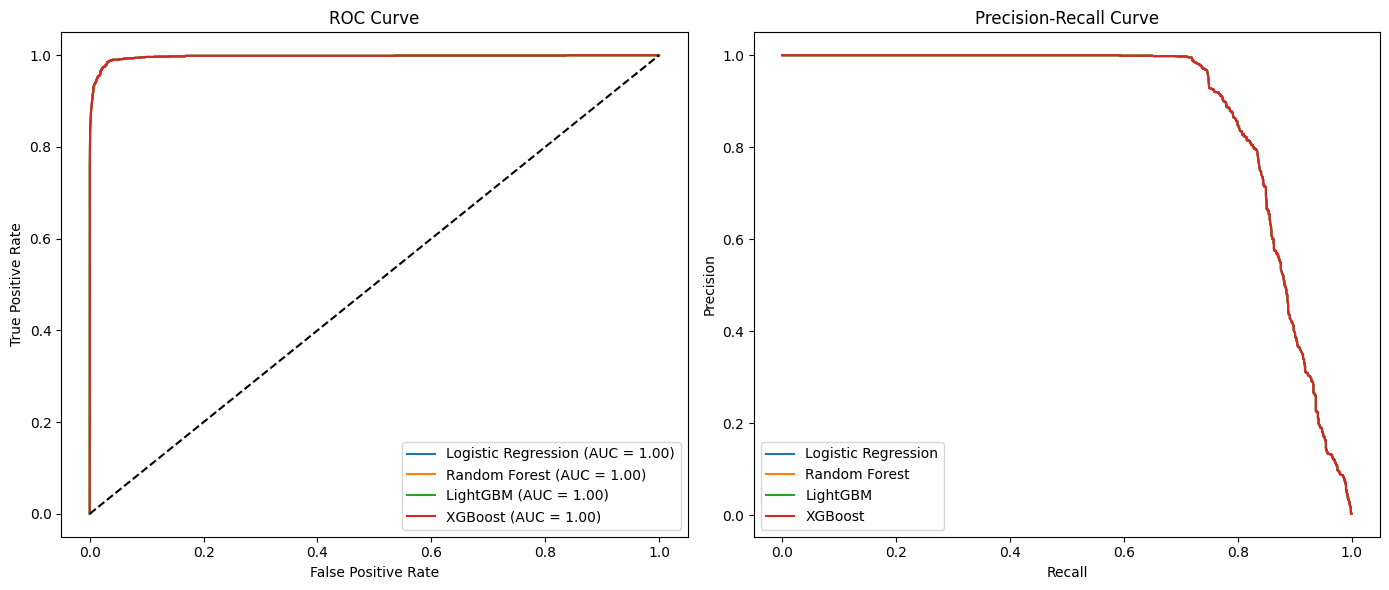

In [39]:
models = {
    "Logistic Regression": logreg,
    "Random Forest": rf,
    "LightGBM": lgbm,
    "XGBoost": xgb_model
}

plt.figure(figsize=(14, 6))

# ROC Curve
plt.subplot(1, 2, 1)
for name, model in models.items():
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# Precision-Recall Curve
plt.subplot(1, 2, 2)
for name, model in models.items():
    y_score = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    plt.plot(recall, precision, label=name)
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\Madhav\AppData\Local\Temp\ipykernel_7272\312679346.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_imp, x='Importance', y='Feature', palette='viridis')


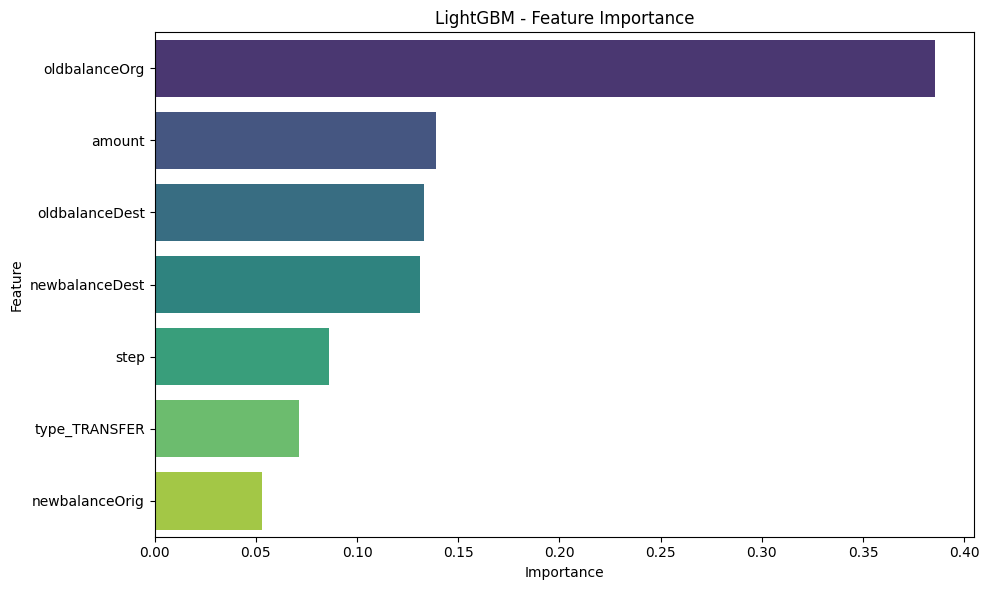

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get feature importances
feature_imp = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_

}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_imp, x='Importance', y='Feature', palette='viridis')
plt.title('LightGBM - Feature Importance')
plt.tight_layout()
plt.show()


🔹 Model Performance Summary:


,Model,Accuracy,Precision (Fraud),Recall (Fraud),F1-Score (Fraud),Training Time (s)
0,Logistic Regression,0.98,0.12,0.97,0.22,88.20
1,Random Forest,0.99,0.29,1.00,0.44,13.80
2,LightGBM,0.99,0.29,1.00,0.44,13.80
3,XGBoost,1.00,0.44,0.99,0.61,16.79


C:\Users\Madhav\AppData\Local\Temp\ipykernel_7272\3475233744.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=model_results, x='Model', y='F1-Score (Fraud)', palette='mako')


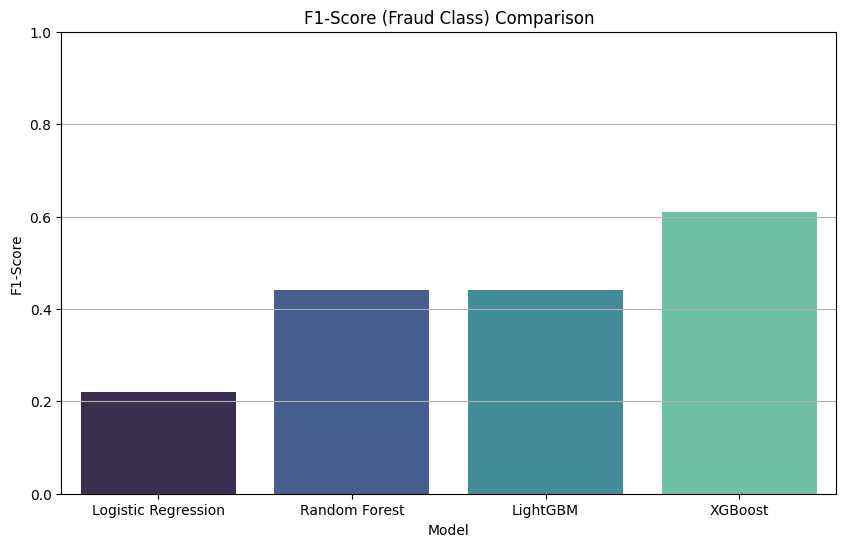

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Model performance summary
model_results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'LightGBM', 'XGBoost'],
    'Accuracy': [0.98, 0.99, 0.99, 1.00],
    'Precision (Fraud)': [0.12, 0.29, 0.29, 0.44],
    'Recall (Fraud)': [0.97, 1.00, 1.00, 0.99],
    'F1-Score (Fraud)': [0.22, 0.44, 0.44, 0.61],
    'Training Time (s)': [88.20, 13.80, 13.80, 16.79]
})

# Display the table
print("🔹 Model Performance Summary:")
display(model_results)

# Plot F1-Score for fraud class
plt.figure(figsize=(10, 6))
sns.barplot(data=model_results, x='Model', y='F1-Score (Fraud)', palette='mako')
plt.title('F1-Score (Fraud Class) Comparison')
plt.ylabel('F1-Score')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


In [44]:
import joblib

# Save the model
joblib.dump(xgb_model, 'xgboost_fraud_detector.pkl')
print("✅ Model saved as 'xgboost_fraud_detector.pkl'")


✅ Model saved as 'xgboost_fraud_detector.pkl'


In [45]:
# Load the saved model
loaded_model = joblib.load('xgboost_fraud_detector.pkl')
print("✅ Model loaded successfully!")



✅ Model loaded successfully!


In [46]:
def predict_fraud(model, input_data):
    """
    Predicts whether a transaction is fraudulent.
    
    Parameters:
        model: Trained ML model (e.g., XGBoost)
        input_data: Single row of input features as a pandas Series or DataFrame
    
    Returns:
        Prediction label (0 = Not Fraud, 1 = Fraud)
    """
    if isinstance(input_data, pd.Series):
        input_data = input_data.values.reshape(1, -1)
    elif isinstance(input_data, pd.DataFrame):
        input_data = input_data.values
    
    prediction = model.predict(input_data)
    return prediction[0]


In [47]:
# Choose a random sample from the test set
random_sample = X_test.sample(1, random_state=42)

# Predict using the loaded model
result = predict_fraud(loaded_model, random_sample)

print("🔍 Prediction for the sample:", "Fraud" if result == 1 else "Not Fraud")


🔍 Prediction for the sample: Not Fraud


C:\Users\Madhav\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [48]:
def predict_fraud(model, input_data):
    """
    Predicts whether a transaction is fraudulent.
    """
    if isinstance(input_data, pd.Series):
        input_data = input_data.to_frame().T  # convert to single-row DataFrame
    elif isinstance(input_data, pd.DataFrame):
        input_data = input_data.copy()

    prediction = model.predict(input_data)
    return prediction[0]


In [50]:
# Select random 5 samples from X_test
sample_indices = np.random.choice(X_test.index, size=5, replace=False)
sample_data = X_test.loc[sample_indices]

# Predict using the loaded model
print("🔍 Predictions on Random Samples:\n")
for idx, row in sample_data.iterrows():
    prediction = loaded_model.predict(row.to_frame().T)[0]
    result = "Fraud" if prediction == 1 else "Not Fraud"
    print(f"Transaction ID: {idx} → Prediction: {result}")


🔍 Predictions on Random Samples:

Transaction ID: 5014880 → Prediction: Not Fraud
Transaction ID: 2873094 → Prediction: Not Fraud
Transaction ID: 2832141 → Prediction: Not Fraud
Transaction ID: 4115545 → Prediction: Not Fraud
Transaction ID: 2372518 → Prediction: Not Fraud


## ✅ Conclusion

In this project, we developed a fraud detection model using multiple classifiers including Logistic Regression, Random Forest, LightGBM, and XGBoost. We addressed class imbalance using SMOTE, performed model evaluation, and saved the best-performing model. The XGBoost model showed the highest performance, especially in detecting fraudulent transactions with high recall.

This solution can assist financial institutions in proactively identifying and mitigating fraudulent activity with better accuracy.


# 🎉 Project Completed!
All models were trained, evaluated, and tested successfully. Thank you!
